In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
%matplotlib inline

Буду использовать распределение Парето. Размер выборки - 1000 элементов. Параметр k равен 2 [https://ru.wikipedia.org/wiki/Распределение_Парето].

In [3]:
param_b = 3
N = 1000
sample1 = ss.pareto.rvs(b=param_b, size=N)

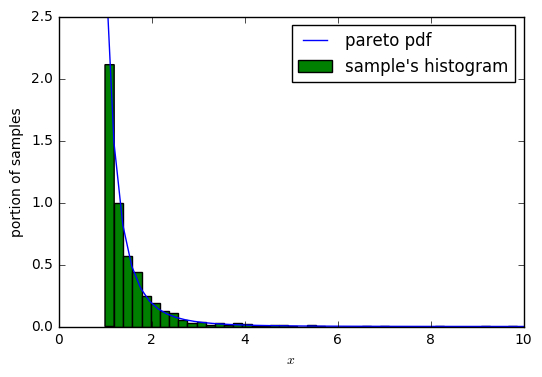

In [81]:
# Теоретическая плотность
x = np.linspace(1,20,100)
pdf = ss.pareto.pdf(x, b=param_b)
plt.plot(x, pdf, label='pareto pdf')

# Гистограмма выборки
plt.hist(sample1, bins=50, normed=True, label="sample's histogram")

plt.xlim(0,10)
plt.ylim(0,2.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('portion of samples')
plt.show()

Генерирую 1000 выборок размером $n \in \{5, 10, 50\}.$

In [82]:
data = []

for n in [5,10,50]:
    tmp = []
    for i in range(1000):
        tmp.append(ss.pareto.rvs(b=param_b, size=n))
    data.append(tmp)

In [83]:
data = np.array(data)
data.shape

(3, 1000)

Считаю выборочное среднее для каждой выборки.

In [84]:
data_means = []

for row in data:
    tmp = []
    for sampl in row:
        tmp.append(np.mean(sampl))
    data_means.append(tmp)
    
np.array(data_means).shape

(3, 1000)

Теоретическое среднее: $\frac{k x_m}{k-1} = \frac{3}{2} = 1.5$, теоретическая дисперсия: $\left(\frac{x_m}{k-1}\right)^2 \frac{k}{k-2} = \frac{3}{4} = 0.75$.

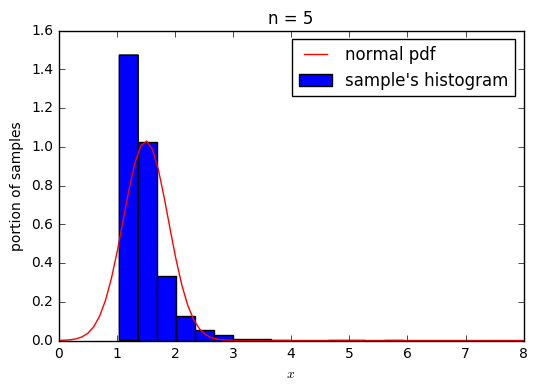

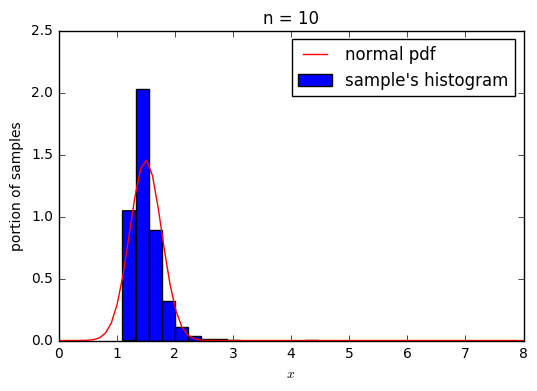

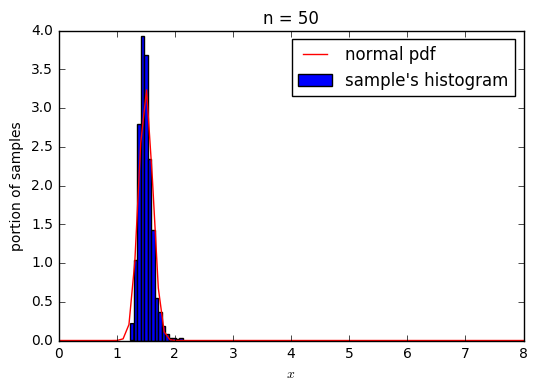

In [93]:
th_var = 0.75
th_mean = 1.5

for i,n in enumerate([5,10,50]):
    # Плотность нормального распределения
    x = np.linspace(0,10,100)
    pdf = ss.norm.pdf(x, loc=th_mean, scale=np.sqrt(th_var/n))
    
    plt.plot(x, pdf, label='normal pdf', color='r')
    
    # Гистограмма каждой из выборок
    plt.hist(data_means[i], bins=15, normed=True, \
                            label="sample's histogram")
    
    plt.title('n = {}'.format(n))
    plt.xlim(0,8)
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('portion of samples')
    plt.show()

Вывод.
С ростом числа элементов выборки точность аппроксимации растёт - что и видно по трём графикам. Очевидно, что пяти элементов недостаточно для хорошей аппроксимации, а пятидесяти - вполне хватает.

In [12]:
import numpy as np
from scipy.interpolate import interp1d

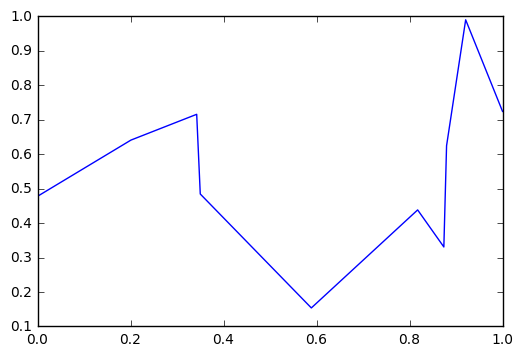

In [46]:
x = sorted([random.random() for i in range(10)])
y = [random.random() for i in range(10)]
x[0] = 0
x[9] = 1
plt.plot(x, y)

In [47]:
x_t = np.linspace(0,1,1000)
y_new = interp1d(x, y, kind='cubic')

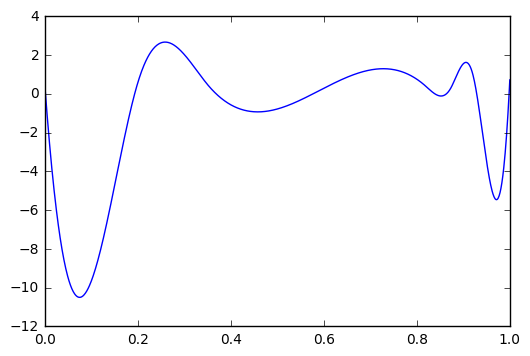

In [48]:
plt.plot(x_t, y_new(x_t))

In [45]:
y_new(0.1)

ValueError: A value in x_new is below the interpolation range.

In [8]:
import random as random

In [11]:
random.random()

0.7078130860601349